In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [6]:
image_path = 'data/Procesado/train/video_11min_295.jpg'
img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)

R, G, B = cv2.split(img)

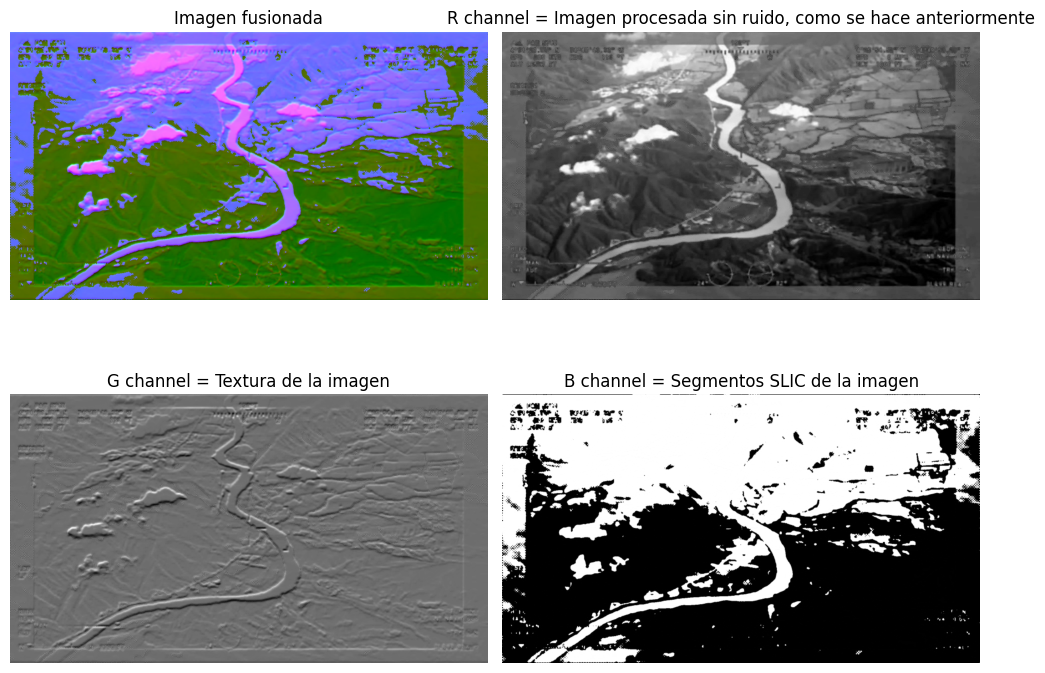

In [7]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].imshow(img)
axs[0, 0].set_title("Imagen fusionada")
axs[0, 0].axis('off')

axs[0, 1].imshow(R, cmap='gray')
axs[0, 1].set_title("R channel = Imagen procesada sin ruido, como se hace anteriormente")
axs[0, 1].axis('off')

axs[1, 0].imshow(G, cmap='gray', vmin=0, vmax=255)
axs[1, 0].set_title("G channel = Textura de la imagen")
axs[1, 0].axis('off')

axs[1, 1].imshow(B, cmap='gray', vmin=0, vmax=255)
axs[1, 1].set_title("B channel = Segmentos SLIC de la imagen")
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

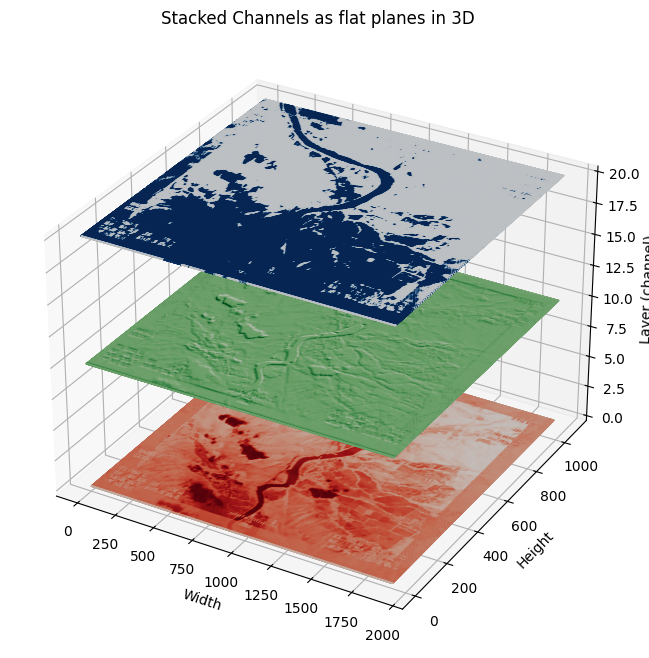

In [13]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = np.arange(R.shape[1])
y = np.arange(R.shape[0])
X, Y = np.meshgrid(x, y)

# Convert to float to avoid overflow
Rf = R.astype(np.float32)
Gf = G.astype(np.float32)
Bf = B.astype(np.float32)

# Normalize intensities to [0,1] for color mapping
Rn = Rf / 255.0
Gn = Gf / 255.0
Bn = Bf / 255.0

# Plot R channel at z=0 (flat plane)
ax.plot_surface(X, Y, np.zeros_like(Rf), facecolors=plt.cm.Reds(Rn), rstride=1, cstride=1)

# Plot G channel at z=10 (shift in z to stack)
ax.plot_surface(X, Y, np.ones_like(Gf)*10, facecolors=plt.cm.Greens(Gn), rstride=1, cstride=1)

# Plot B channel at z=20 (shift in z to stack)
ax.plot_surface(X, Y, np.ones_like(Bf)*20, facecolors=plt.cm.Blues(Bn), rstride=1, cstride=1)

ax.set_xlabel('Width')
ax.set_ylabel('Height')
ax.set_zlabel('Layer (channel)')
ax.set_title('Stacked Channels as flat planes in 3D')

plt.show()
